In [76]:
import csv
import pprint

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as ml
import seaborn as sns
import plotly
import warnings
from scipy import stats


data2 = pd.read_csv('/content/master.csv')

In [77]:
data2["HDI for year"].replace(np.nan,0, inplace=True)

In [89]:
data2 = data2[data2.year <= 2013]

In [90]:
data2.columns = [c.replace('$', '').replace('(', '').replace(')', '').strip().replace(' ', '_').replace('/','_') for c in data2.columns]
print(data2.describe())

               year   suicides_no  ...  HDI_for_year  gdp_per_capita
count  25980.000000  25980.000000  ...  25980.000000    25980.000000
mean    2000.315012    242.732602  ...      0.222010    16163.870670
std        7.957347    909.305012  ...      0.353287    18179.459186
min     1985.000000      0.000000  ...      0.000000      251.000000
25%     1994.000000      2.000000  ...      0.000000     3278.000000
50%     2001.000000     24.000000  ...      0.000000     8651.000000
75%     2007.000000    131.000000  ...      0.655000    24259.000000
max     2013.000000  22338.000000  ...      0.942000   122729.000000

[8 rows x 6 columns]


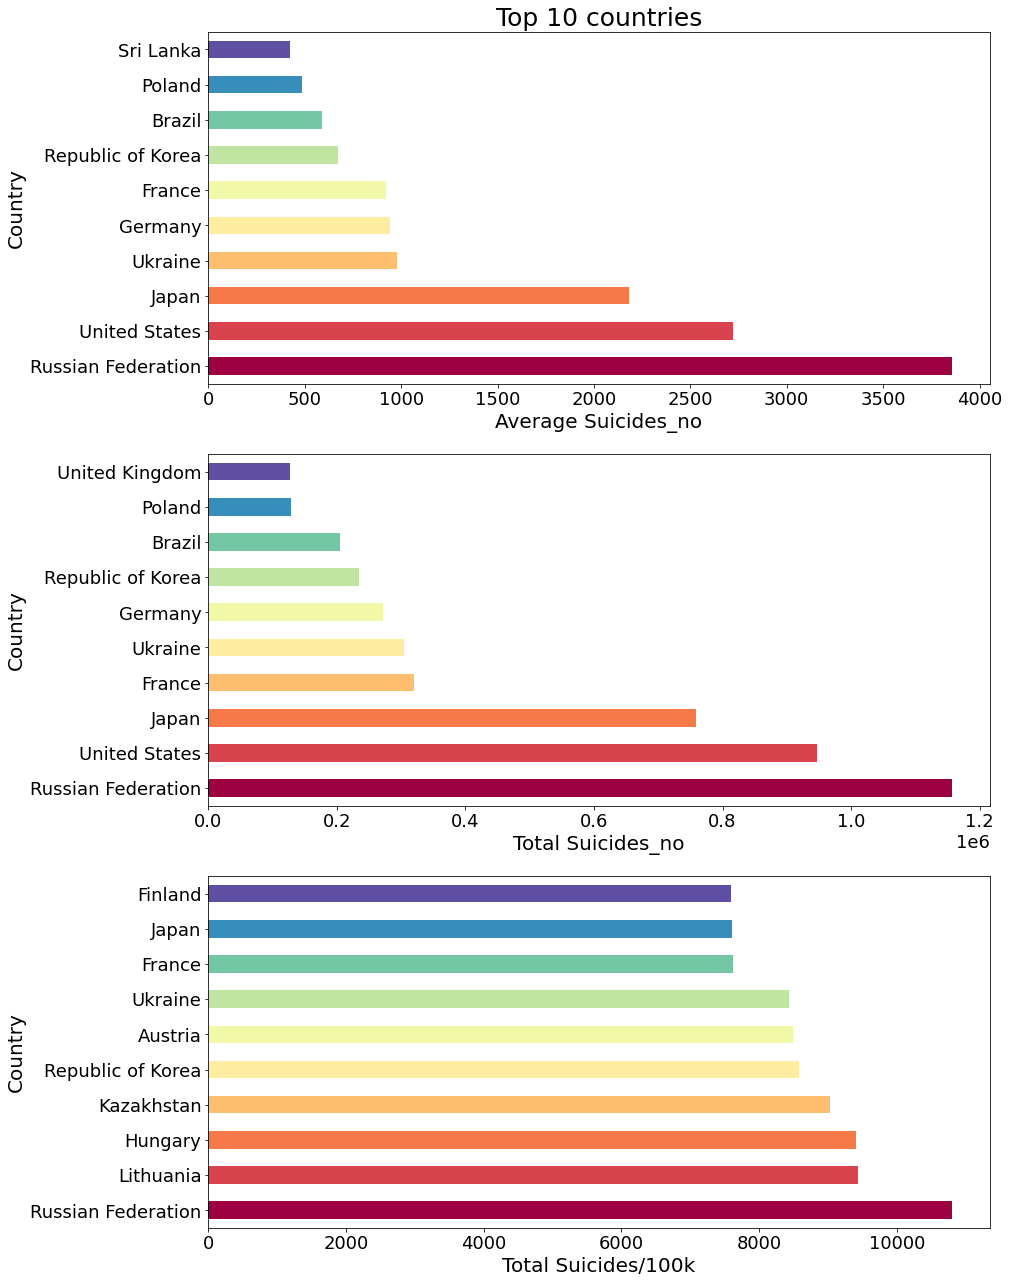

In [98]:
col = plt.cm.Spectral(np.linspace(0, 1, 10))

plt.figure(figsize=(14, 22))


plt.subplot(313)
data2.groupby(['country']).suicides_100k_pop.sum().nlargest(10).plot(kind='barh', color=col)
plt.xlabel('Total Suicides/100k', size=20)
plt.ylabel('Country', fontsize=20)


plt.subplot(311)
data2.groupby(['country']).suicides_no.mean().nlargest(10).plot(kind='barh', color=col)
plt.xlabel('Average Suicides_no', size=20)
plt.ylabel('Country', fontsize=20);
plt.title('Top 10 countries', fontsize=25)

plt.subplot(312)
data2.groupby(['country']).suicides_no.sum().nlargest(10).plot(kind='barh', color=col)
plt.xlabel('Total Suicides_no', size=20)
plt.ylabel('Country', fontsize=20);

위의 그래프들은 각각 'Average Suicides_no', 'Total Suicides_no', 'Total Suicides/100k'를 기준으로 top 10 국가들과 해당 통계값들을 보여준다.
Suicides_no를 이용한 결과는 국가의 인구에 의한 영향이 클 것이라는 판단 하에 Suicides/100k를 아용한 통계도 내보았다. 한국은 두가지 통계 결과 모두에서 상위권에 포함되어 자살률이 심각한 국가라는 것을 확인할 수 있다. 

Text(0.5, 1.0, 'Suicides number over time (1985 ~ 2013)')

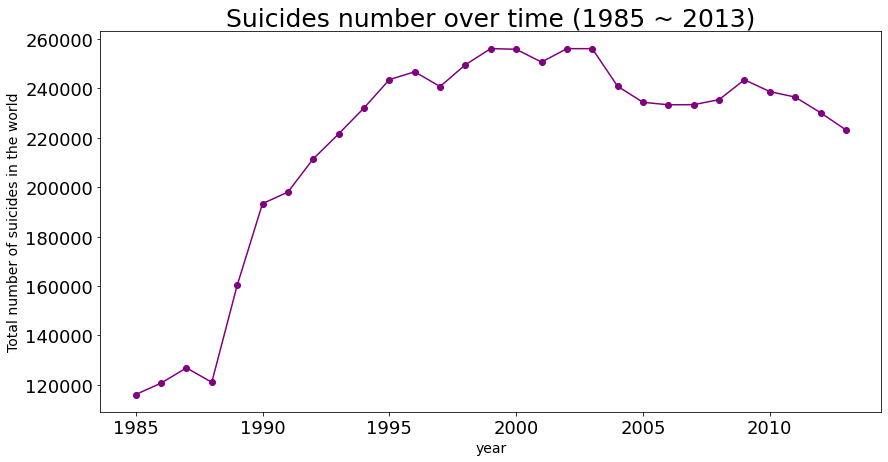

In [101]:
year = data2.groupby('year').year.unique()



totalpyear = pd.DataFrame(data2.groupby('year').suicides_no.sum())

plt.figure(figsize=(14,7))
plt.plot(year.index, totalpyear, marker = 'o', color = 'purple')
plt.xlabel('year', fontsize=14)
plt.ylabel('Total number of suicides in the world', fontsize=14)
plt.title('Suicides number over time (1985 ~ 2013)', fontsize=25)

위의 그래프는 년도에 따른 전세계의 자살 수를 나타낸다. 1980년대 후반부터 2000년까지 상당히 큰 기울기로 증가함을 확인할 수 있다. 그리고 2000년 이후부터 약간의 감소 추세가 보이지만 그럼에도 꽤 높은 자살 수를 오랜 기간 유지하고 있다는 문제점을 지적할 수 있다.

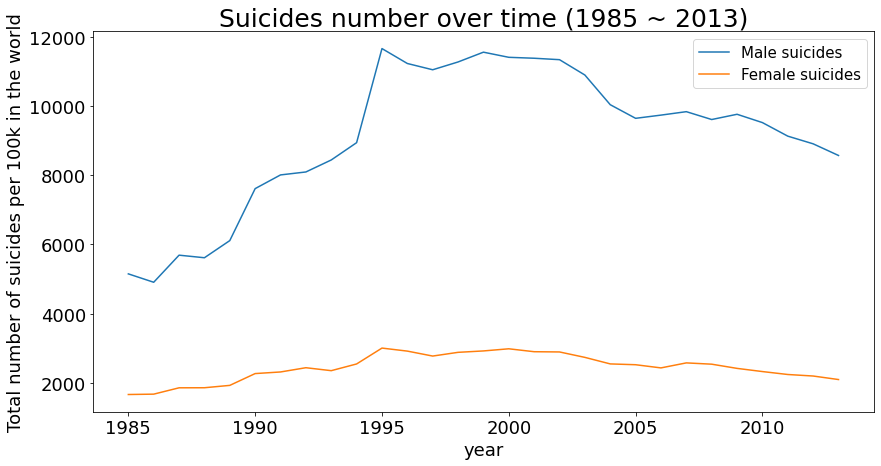

In [103]:
 year = data2.groupby('year').year.unique()

malesuicides = pd.DataFrame(data2[data2.sex == 'male'].groupby('year').suicides_100k_pop.sum())
femalesuicides = pd.DataFrame(data2[data2.sex == 'female'].groupby('year').suicides_100k_pop.sum())
plt.figure(figsize=(14,7))
plt.title('Suicides number over time (1985 ~ 2013)', fontsize=25)
plt.plot(year.index, malesuicides,label="Male suicides")
plt.plot(year.index, femalesuicides,label="Female suicides")
plt.xlabel('year', fontsize=18)
plt.ylabel('Total number of suicides per 100k in the world', fontsize=18)
plt.legend(fontsize=15)
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
plt.show()
plt.clf()
plt.cla()
plt.close()

위의 그래프는 자살 수 시계열 데이터를 성별을 기준으로 나누어 그린 그래프이다. 해당 그래프를 통해 남자가 여자보다 훨씬 많이 자살을 함을 알 수 있다. 경향성은 대충 비슷하게 보인다. 

['15-24 years' '35-54 years' '75+ years' '25-34 years' '55-74 years'
 '5-14 years']


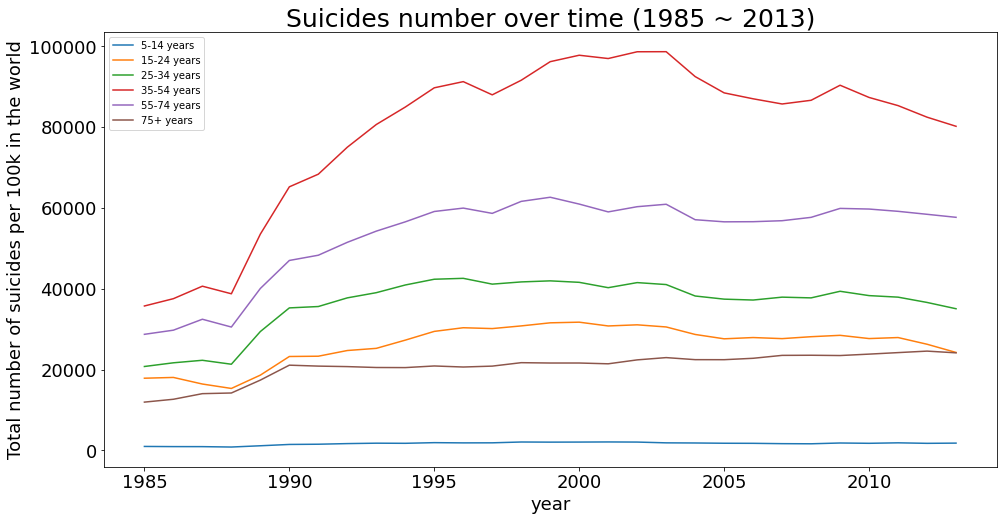

In [104]:
agegroups = data2.age.unique()
print(agegroups)

agegone_suicides = pd.DataFrame(data2[data2.age == '5-14 years'].groupby('year').suicides_no.sum())
agegtwo_suicides = pd.DataFrame(data2[data2.age == '15-24 years'].groupby('year').suicides_no.sum())
agegthr_suicides = pd.DataFrame(data2[data2.age == '25-34 years'].groupby('year').suicides_no.sum())
agegfou_suicides = pd.DataFrame(data2[data2.age == '35-54 years'].groupby('year').suicides_no.sum())
agegfiv_suicides = pd.DataFrame(data2[data2.age == '55-74 years'].groupby('year').suicides_no.sum())
agegsix_suicides = pd.DataFrame(data2[data2.age == '75+ years'].groupby('year').suicides_no.sum())

plt.figure(figsize=(16,8))
plt.title('Suicides number over time (1985 ~ 2013)', fontsize=25)
plt.plot(year.index, agegone_suicides,label='5-14 years')
plt.plot(year.index, agegtwo_suicides,label='15-24 years')
plt.plot(year.index, agegthr_suicides,label='25-34 years')
plt.plot(year.index, agegfou_suicides,label='35-54 years')
plt.plot(year.index, agegfiv_suicides,label='55-74 years')
plt.plot(year.index, agegsix_suicides,label='75+ years')
plt.xlabel('year', fontsize=18)
plt.ylabel('Total number of suicides per 100k in the world', fontsize=18)
plt.legend(fontsize='medium')
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
plt.show()
plt.clf()
plt.cla()
plt.close()

위의 그래프는 자살 수 시계열 데이터를 연령대를 기준으로 나누어 그린 그래프이다. 가장 자살 수가 많은 연령대는 35-54이고, 가장 적은 연령대는 5-14이다. 35-54의 데이터를 보면 2000년 이후에 약간 감소하는 경향성을 띄는데, 이 때문에 전체 자살 수도 감소하는 경향성을 보였다는 것을 알 수 있다. 35-54를 제외하고 다른 연령대에서는 크게 감소하는 추세가 보이지 않고 75+ 연령대는 오히려 점점 증가하고 있음을 알 수 있다.

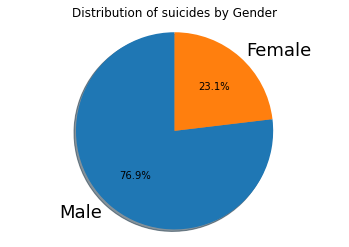

In [43]:
labels = 'Male', 'Female'
values = [np.sum(data2[data2.sex.eq("male")].suicides_no), np.sum(data2[data2.sex.eq("female")].suicides_no)]
fig1, ax1 = plt.subplots()
ax1.pie(values,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Distribution of suicides by Gender')
plt.show()
plt.clf()
plt.cla()
plt.close()

남성의 자살 수가 여성보다 약 3배 이상 높다는 것을 확인할 수 있다.

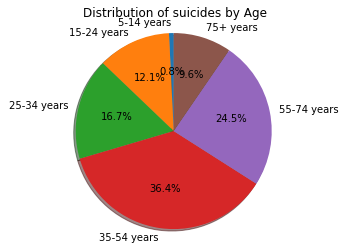

In [57]:
labels = '5-14 years', '15-24 years','25-34 years','35-54 years','55-74 years','75+ years'
values =[]
for eachlab in labels:
    values.append(np.sum(data2[data2.age.eq(eachlab)].suicides_no))

fig1, ax1 = plt.subplots()
ax1.pie(values,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops=dict(size =10) )
ax1.axis('equal')
plt.title('Distribution of suicides by Age')
plt.show()
plt.clf()
plt.cla()
plt.close()

35-54 연령대와 55-74연령대가 60% 이상을 차지하고 있다.

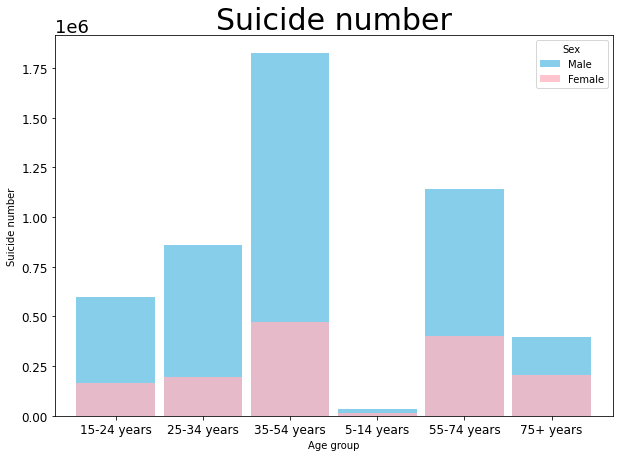

In [64]:
gsd02=pd.DataFrame(data2.groupby(['age','sex'])['suicides_no'].sum().unstack())

gsd02.iloc[:,1].plot(kind='bar', color='skyblue', width = 0.9, figsize=(10,7))
gsd02.iloc[:,0].plot(kind='bar', color='lightpink', width = 0.9, alpha = 0.8,figsize=(10,7))
plt.ylabel('Suicide number')
plt.yticks(rotation = 0, fontsize =12)
plt.xlabel('Age group')
plt.xticks(rotation = 0, fontsize =12)
plt.title('Suicide number', fontsize =30)
plt.legend(['Male','Female'], bbox_to_anchor=(1, 1),title = 'Sex')
plt.show()
plt.clf()
plt.cla()
plt.close()

위의 그래프를 통해 각 연령대별로 남여비율까지 확인할 수 있다. 75+ 를 제외하고는 모든 연령대에서 여성보다 남성의 자살 수가 높다는 것을 알 수 있다.